# Import Packages and Data

In [1]:
import numpy as np
np.random.seed(1248)

In [2]:
import tensorflow
import keras
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import pickle
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

Using TensorFlow backend.


In [3]:
data = pd.read_csv('../data/buffer_overflow_data.csv.gz')
labels = data.copy()
del labels['Unnamed: 0']
del labels['Unnamed: 0.1']
del labels['filename']
del labels['code']
del labels['flaw']
del labels['flaw_loc']
labels = labels.drop_duplicates().sort_values('testcase_ID').reset_index(drop=True)

In [4]:
x = pd.read_csv("../data/buffer_overflow_graph_embeddings.csv.gz")
x['testcase_ID'] = x['type']
del x['type']
x = x.sort_values("testcase_ID").reset_index(drop=True)

In [5]:
y = labels['bug']
x = x.drop('testcase_ID', axis='columns')

In [7]:
import pickle

with open('../data/x-train-binary','rb') as f:
    x_train = pickle.load(f)
    
with open('../data/y-train-binary','rb') as f:
    y_train = pickle.load(f)
    
with open('../data/x-test-binary','rb') as f:
    x_test = pickle.load(f)
    
with open('../data/y-test-binary','rb') as f:
    y_test = pickle.load(f)

In [9]:
x_test.shape

(4301, 128)

# [Neural tutorial](https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7)

In [10]:
with open('../data/baseline-model-binary','rb') as f:
    model = pickle.load(f)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [11]:
with open('../data/binary-convolutional','rb') as f:
    conv_model = pickle.load(f)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
nn_evaluate = model.evaluate(x_test,y_test)
conv_nn_evaluate = conv_model.evaluate(x_test,y_test)

4301/4301 [==============================] - 0s 79us/step


In [13]:
nn_score = nn_evaluate[1]
conv_nn_score = conv_nn_evaluate[1]

In [14]:
nn_score

0.9118809579306218

In [15]:
conv_nn_score

0.9479190885840503

In [16]:
y_pred = model.predict_classes(x)

In [17]:
import seaborn as sns
from sklearn import metrics
import matplotlib

In [18]:
y_predict = model.predict(x_test)

## Visualisations

In [20]:
import numpy as np
from matplotlib.colors import LogNorm

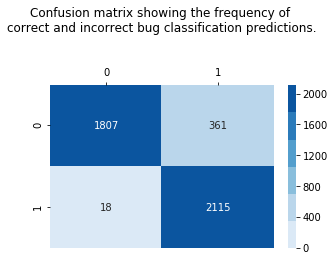

In [21]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_predict)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [22]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_predict)).flatten().tolist()

fpr_nn = fp/(fp+tp)
fnr_nn = fn/(fn+tn)

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [24]:
rf.score(x_test, y_test)

0.6386809323441336

In [25]:

y_pred_rf = pd.DataFrame(rf.predict(x_test))
y_pred_rf = y_pred_rf.set_index(y_test.index)

In [26]:
bin_y_pred_rf = np.rint(y_pred_rf)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
rf_accuracy = accuracy_score(y_test, np.rint(y_pred_rf))

In [ ]:
from sklearn import metrics
import matplotlib
from matplotlib import pyplot
import seaborn as sns

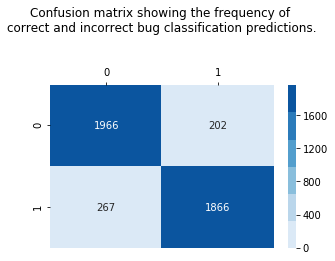

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_rf)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_rf)).flatten().tolist()

fpr_rf = fp/(fp+tp)
fnr_rf = fn/(fn+tn)

Sort Visualisation Below!

# KNN

## 1NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

oneknn = KNeighborsClassifier(n_neighbors=1, algorithm = 'kd_tree', weights = 'distance')
oneknn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [ ]:
y_pred_oneknn = pd.DataFrame(oneknn.predict(x_test))
y_pred_oneknn = y_pred_oneknn.set_index(y_test.index)

In [ ]:
oneknn_score=oneknn.score(x_test,y_test)

In [ ]:
oneknn_score

0.8312020460358056

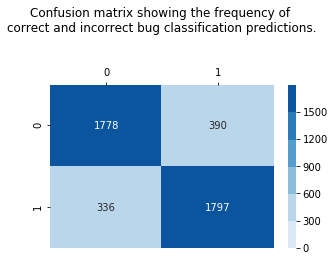

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_oneknn)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_oneknn)).flatten().tolist()

fpr_onenn = fp/(fp+tp)
fnr_onenn = fn/(fn+tn)

2NN returns the same as one

## 3NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

threeknn = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
threeknn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
y_pred_threeknn = pd.DataFrame(threeknn.predict(x_test))

In [ ]:
y_pred_threeknn = y_pred_threeknn.set_index(y_test.index)

In [ ]:
threeknn_score=threeknn.score(x_test,y_test)

In [ ]:
threeknn_score

0.820274354801209

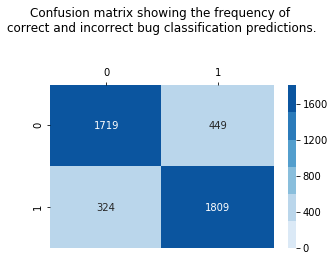

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_threeknn)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_threeknn)).flatten().tolist()

fpr_threenn = fp/(fp+tp)
fnr_threenn = fn/(fn+tn)

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)

In [ ]:
total_error = (y_test != y_pred_gnb).sum()

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],total_error))
print("Accuracy " + str(1- (total_error/x_test.shape[0])))

Number of mislabeled points out of a total 4301 points : 1707
Accuracy 0.6031155545222041


In [ ]:
gnb_score = 1- (total_error/x_test.shape[0])

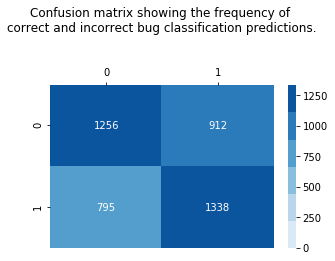

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_gnb)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_gnb)).flatten().tolist()

fpr_gnb = fp/(fp+tp)
fnr_gnb = fn/(fn+tn)

## SVM



In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel = 'poly', gamma='scale', degree = 3)
clf_svm.fit(x_train, y_train)  

y_pred_svm = clf_svm.predict(x_test)

In [ ]:
total_error = (y_test != y_pred_svm).sum()

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],total_error))
print("Accuracy " + str(1- (total_error/x_test.shape[0])))

Number of mislabeled points out of a total 4301 points : 496
Accuracy 0.8846779818646826


In [ ]:
svm_score = 1- (total_error/x_test.shape[0])

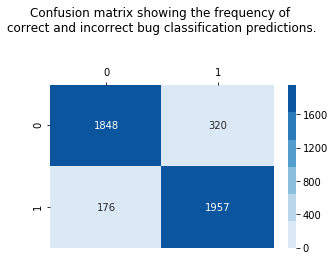

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_svm)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_svm)).flatten().tolist()

fpr_svm = fp/(fp+tp)
fnr_svm = fn/(fn+tn)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(penalty = 'l1')
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = logreg.predict(x_test)
print('Accuracy ' + str(logreg.score(x_test, y_test)))

Accuracy 0.9011857707509882
Accuracy 0.9018832829574518


In [ ]:
logreg_accuracy = logreg.score(x_test, y_test)

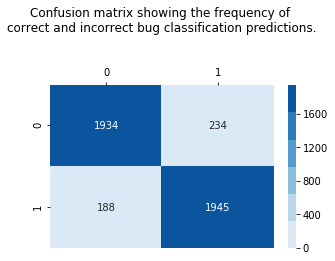

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_lr)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_lr)).flatten().tolist()

fpr_logreg = fp/(fp+tp)
fnr_logreg = fn/(fn+tn)

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
clf_ab = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ab.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
y_pred_ab = clf_ab.predict(x_test)
# y_pred = y_pred.reshape(-1,1)
# y_pred.shape

In [ ]:
total_error = (y_test != y_pred_ab).sum()

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],total_error))
print("Accuracy " + str(1- (total_error/x_test.shape[0])))

Number of mislabeled points out of a total 4301 points : 885
Accuracy 0.7942338990932342


In [ ]:
ab_accuracy = 1-(total_error/x_test.shape[0])

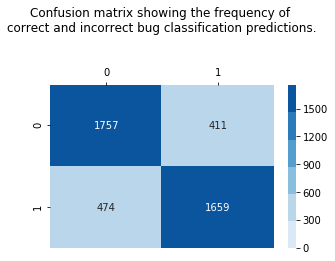

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_ab)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_ab)).flatten().tolist()

fpr_ab = fp/(fp+tp)
fnr_ab = fn/(fn+tn)

# XGBoost

In [ ]:
!pip install xgboost

     |################################| 142.8MB 62kB/s  eta 0:00:01   |                                | 2.6MB 3.8MB/s eta 0:00:38     |#                               | 8.5MB 6.8MB/s eta 0:00:20     |##                              | 11.7MB 6.8MB/s eta 0:00:20     |#####                           | 24.0MB 7.1MB/s eta 0:00:17     |######                          | 29.8MB 7.3MB/s eta 0:00:16     |######                          | 31.2MB 7.3MB/s eta 0:00:16     |#######                         | 32.9MB 7.3MB/s eta 0:00:15     |#######                         | 34.6MB 7.3MB/s eta 0:00:15     |#######                         | 35.0MB 7.3MB/s eta 0:00:15  | 43.3MB 7.0MB/s eta 0:00:15     |############                    | 54.3MB 6.4MB/s eta 0:00:14     |############                    | 54.6MB 6.4MB/s eta 0:00:14     |##################              | 80.6MB 6.5MB/s eta 0:00:10     |####################            | 89.8MB 8.0MB/s eta 0:00:0790.3MB 8.0MB/s eta 0:00:07     |#################

In [ ]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model_xgb.fit(x_train, y_train)
model_xgb.score(x_test,y_test)

0.690537084398977

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)

In [ ]:
total_error = (y_test != y_pred_xgb).sum()

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],total_error))
print("Accuracy " + str(1- (total_error/x_test.shape[0])))

Number of mislabeled points out of a total 4301 points : 1331
Accuracy 0.690537084398977


In [ ]:
xgb_accuracy = 1- (total_error/x_test.shape[0])

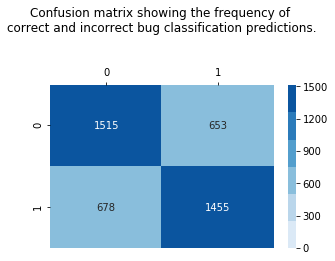

In [ ]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, np.rint(y_pred_xgb)), 
    
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(5, 3)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, np.rint(y_pred_xgb)).flatten().tolist()

fpr_xgb = fp/(fp+tp)
fnr_xgb = fn/(fn+tn)

# Table of Results

In [ ]:
results = {'Model': ['Neural Network', 'Random Forest', '1 Nearest Neighbour', '3 Nearest Neighbours', 'Gaussian Naive Bayes', 'SVM', 'Logistic Regression', 'AdaBoost', 'XGBoost'], 
           'Accuracy' : [nn_score, rf_accuracy, oneknn_score, threeknn_score, gnb_score, svm_score, logreg_accuracy, ab_accuracy, xgb_accuracy],
          'FPR' : [fpr_nn,fpr_rf,fpr_onenn,fpr_threenn,fpr_gnb,fpr_svm,fpr_logreg,fpr_ab,fpr_xgb],
          'FNR' : [fnr_nn,fnr_rf,fnr_onenn,fnr_threenn,fnr_gnb,fnr_svm,fnr_logreg,fnr_ab,fnr_xgb]}
accuracy_table = pd.DataFrame(data = results)

In [ ]:
accuracy_table.sort_values(by = ['Accuracy'], ascending=False)

,Model,Accuracy,FPR,FNR
0,Neural Network,0.911881,0.145800,0.009863
6,Logistic Regression,0.901883,0.107389,0.088596
1,Random Forest,0.890956,0.097679,0.119570
5,SVM,0.884678,0.140536,0.086957
2,1 Nearest Neighbour,0.831202,0.178326,0.158940
3,3 Nearest Neighbours,0.820274,0.198849,0.158590
7,AdaBoost,0.794234,0.198551,0.212461
8,XGBoost,0.690537,0.309772,0.309166
4,Gaussian Naive Bayes,0.603116,0.405333,0.387616


,Model,Accuracy,FPR,FNR
0,Neural Network,0.911881,0.145800,0.009863
6,Logistic Regression,0.901883,0.107389,0.088596
1,Random Forest,0.890956,0.097679,0.119570
5,SVM,0.884678,0.140536,0.086957
2,1 Nearest Neighbour,0.831202,0.178326,0.158940
3,3 Nearest Neighbours,0.820274,0.198849,0.158590
7,AdaBoost,0.794234,0.198551,0.212461
8,XGBoost,0.690537,0.309772,0.309166
4,Gaussian Naive Bayes,0.603116,0.405333,0.387616


For T-SNE visualisations:

In [84]:
true_labels = pd.DataFrame(y_test +0)

In [85]:
pred_compare = pd.DataFrame()
pred_compare['true_label'] = true_labels['bug']
pred_compare['neuralnet'] = np.rint(y_predict).astype(int)
pred_compare['rf'] = np.rint(y_pred_rf).astype(int)
pred_compare['1nn'] = np.rint(y_pred_oneknn).astype(int)
pred_compare['3nn'] = np.rint(y_pred_threeknn).astype(int)
pred_compare['gnb'] = np.rint(y_pred_gnb).astype(int)
pred_compare['svm'] = np.rint(y_pred_svm).astype(int)
pred_compare['logreg'] = np.rint(y_pred_lr).astype(int)
pred_compare['ab'] = np.rint(y_pred_ab).astype(int)
pred_compare['xgb'] = np.rint(y_pred_xgb).astype(int)

In [86]:
pred_compare.to_csv('../data/compare_predictions.csv.gz')

# Stacking

In [89]:
!pip install vecstack

  Stored in directory: /root/.cache/pip/wheels/35/6d/ca/bce17942bcf7c267b13c97c9c95e2f0ecf0b42160e6074f448
Successfully built vecstack


In [90]:
from vecstack import stacking

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [91]:
# models = [clf_svm, logreg]
models = [clf_svm, logreg, oneknn]

In [92]:
S_train, S_test = stacking(models,                   
                           x_train, y_train, x_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVC]
    fold  0:  [0.87747036]
    fold  1:  [0.88677052]
    fold  2:  [0.88720930]
    fold  3:  [0.88229821]
    ----
    MEAN:     [0.88343710] + [0.00394463]
    FULL:     [0.88343701]

model  1:     [LogisticRegression]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.88537549]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.89537317]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.89441860]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


    fold  3:  [0.88695045]
    ----
    MEAN:     [0.89052943] + [0.00441474]
    FULL:     [0.89052962]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.81260172]
    fold  1:  [0.82376192]
    fold  2:  [0.81162791]
    fold  3:  [0.82065597]
    ----
    MEAN:     [0.81716188] + [0.00517661]
    FULL:     [0.81716179]



In [122]:
S_train.shape

(17201, 3)

In [127]:
S_train

array([[1, 1, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1]])

In [123]:
level_two = clf_svm.fit(S_train, y_train)
y_pred_stack = level_two.predict(S_test)

In [124]:
print('Final prediction score: [%.8f]' % accuracy_score(y_test, np.rint(y_pred_stack)))

Final prediction score: [0.92071611]


In [93]:
from keras.layers import RepeatVector, Permute, Lambda, ActivityRegularization, AveragePooling1D
from keras.optimizers import Nadam, Adagrad
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, Conv2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop, Adadelta, Adam

In [94]:
conv_model_stack = Sequential()

conv_model_stack.add(Dense(128, input_dim=3, activation='sigmoid'))
conv_model_stack.add(RepeatVector(3))


# conv_model.add(Lambda(lambda x: x ** 3))

# conv_model.add(Permute(2,1))

conv_model_stack.add(Conv1D(filters = 64, kernel_size = 3, strides = 1, activation ='sigmoid'))
conv_model_stack.add(Dropout(0.5))
conv_model_stack.add(MaxPooling1D(pool_size = 2, padding = 'same'))
# conv_model.add(Conv1D(filters = 64, kernel_size = 3, activation ='linear'))
# conv_model.add(LeakyReLU(alpha=0.1))
# conv_model.add(MaxPooling1D(pool_size = 2, padding = 'same'))
conv_model_stack.add(Flatten())

conv_model_stack.add(Lambda(lambda x: x**2))

conv_model_stack.add(Dense(128, activation='sigmoid'))
# conv_model.add(LeakyReLU(alpha=0.1))
conv_model_stack.add(Dropout(0.05))

conv_model_stack.add(Dense(units=1, activation='sigmoid'))

conv_model_stack.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             24640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 64)                0         
__________

In [95]:
conv_model_stack.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
conv_model_stack.fit(S_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
17201/17201 [==============================] - 2s 96us/step - loss: 0.3928 - acc: 0.8119
Epoch 2/50
17201/17201 [==============================] - 1s 52us/step - loss: 0.2397 - acc: 0.9191
Epoch 3/50
17201/17201 [==============================] - 1s 68us/step - loss: 0.2354 - acc: 0.9211
Epoch 4/50
17201/17201 [==============================] - 1s 61us/step - loss: 0.2355 - acc: 0.9213
Epoch 5/50
17201/17201 [==============================] - 1s 57us/step - loss: 0.2324 - acc: 0.9210
Epoch 6/50
17201/17201 [==============================] - 1s 58us/step - loss: 0.2334 - acc: 0.9220
Epoch 7/50
17201/17201 [==============================] - 1s 55us/step - loss: 0.2328 - acc: 0.9201
Epoch 8/50
17201/17201 [==============================] - 1s 59us/step - loss: 0.2305 - acc: 0.9220
Epoch 9/50
17201/17201 [==============================] - 1s 60us/step - loss: 0.2279 - acc: 0.9214
Epoch 10/50
17201/17201 [==============================] - 1s 60us/step - loss: 0.2300 - acc: 0.9224

In [98]:
#Why
y_pred_stack = conv_model_stack.predict(S_test)

In [99]:
conv_model_stack.evaluate(S_test,y_test)

4301/4301 [==============================] - 0s 64us/step


[0.22800226561193326, 0.9207161125319693]

## RF to CNN

In [100]:
y_pred_rf_s = pd.DataFrame(rf.predict(x_train))
y_pred_rf_s = y_pred_rf_s.set_index(y_train.index)
y_pred_rf_s = np.rint(y_pred_rf_s)

In [101]:
conv_model_stack_1 = Sequential()

conv_model_stack_1.add(Dense(128, input_dim=1, activation='sigmoid'))
conv_model_stack_1.add(RepeatVector(3))


# conv_model.add(Lambda(lambda x: x ** 3))

# conv_model.add(Permute(2,1))

conv_model_stack_1.add(Conv1D(filters = 64, kernel_size = 3, strides = 1, activation ='sigmoid'))
conv_model_stack_1.add(Dropout(0.5))
conv_model_stack_1.add(MaxPooling1D(pool_size = 2, padding = 'same'))
# conv_model.add(Conv1D(filters = 64, kernel_size = 3, activation ='linear'))
# conv_model.add(LeakyReLU(alpha=0.1))
# conv_model.add(MaxPooling1D(pool_size = 2, padding = 'same'))
conv_model_stack_1.add(Flatten())

conv_model_stack_1.add(Lambda(lambda x: x**2))

conv_model_stack_1.add(Dense(128, activation='sigmoid'))
# conv_model.add(LeakyReLU(alpha=0.1))
conv_model_stack_1.add(Dropout(0.05))

conv_model_stack_1.add(Dense(units=1, activation='sigmoid'))

conv_model_stack_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               256       
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 64)             24640     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 64)                0         
__________

In [102]:
conv_model_stack_1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
conv_model_stack_1.fit(y_pred_rf_s, y_train, epochs=50, batch_size=64)

Epoch 1/50
17201/17201 [==============================] - 1s 83us/step - loss: 0.4105 - acc: 0.7797
Epoch 2/50
17201/17201 [==============================] - 1s 57us/step - loss: 0.0059 - acc: 0.9999
Epoch 3/50
17201/17201 [==============================] - 1s 57us/step - loss: 0.0017 - acc: 1.0000
Epoch 4/50
17201/17201 [==============================] - 1s 57us/step - loss: 8.5292e-04 - acc: 1.0000
Epoch 5/50
17201/17201 [==============================] - 1s 58us/step - loss: 5.7239e-04 - acc: 1.0000
Epoch 6/50
17201/17201 [==============================] - 1s 60us/step - loss: 4.0577e-04 - acc: 1.0000
Epoch 7/50
17201/17201 [==============================] - 1s 54us/step - loss: 2.7621e-04 - acc: 1.0000
Epoch 8/50
17201/17201 [==============================] - 1s 57us/step - loss: 2.1278e-04 - acc: 1.0000
Epoch 9/50
17201/17201 [==============================] - 1s 58us/step - loss: 1.6613e-04 - acc: 1.0000
Epoch 10/50
17201/17201 [==============================] - 1s 60us/step - lo

In [104]:
y_pred_stack_rf = conv_model_stack_1.predict(bin_y_pred_rf)

In [105]:
conv_model_stack_1.evaluate(bin_y_pred_rf,y_test)

4301/4301 [==============================] - 0s 49us/step


[1.596572347378628, 0.8909555917367135]